In [1]:
import utils
import warnings

warnings.filterwarnings('ignore')
utils.set_css_style('style.css')

# 1. Data Splitting

## 1.1. Why split the data?

To use an analogy, let’s say you teach a child to multiply by letting the kid train on the small multiplication table, i.e. everything from 1x1 to 9x9.

Next, you test whether the kid is able to perform the same multiplications. The result is a success. The kid gets it right almost every time.

<img src="figures/multiplication.jpeg" alt="multiplication" style="width: 300px;"/>

What’s the problem here?

You don’t know if the kid understands multiplication at all, or has simply memorized the table!

So what you would do instead is test the kid on multiplications like 11x12, that are outside of the table.

This is exactly why we need to test machine learning models on unseen data. Otherwise, we have no way of knowing whether the algorithm has learned a generalizable pattern or has simply memorized the training data.

## 1.2. Training, validation & test datasets

Data splits usually depends on the use case. But typically, we split data into 3 main datasets:

* Training dataset
* Validation dataset
* Testing dataset

<img src="figures/splits.png" alt="splits" style="width: 500px;"/>

Let's quote the base definitions from Jason Brownlee’s excellent article on this topic, as it is quite comprehensive:

### 1.2.1. Training dataset

> Training Dataset: The sample of data used to fit the model.

The actual dataset that we use to train the model (weights and biases in the case of Neural Network). The model sees and learns from this data.


### 1.2.2. Validation dataset

> Validation Dataset: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.

The validation set is used to evaluate a given model, but this is for frequent evaluation. We as machine learning engineers use this data to fine-tune the model hyperparameters. Hence the model occasionally sees this data, but never does it “Learn” from this. We use the validation set results and update higher level hyperparameters. So the validation set in a way affects a model, but indirectly.

### 1.2.3. Test dataset

> Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

The Test dataset provides the gold standard used to evaluate the model. It is only used once a model is completely trained (using the train and validation sets). The test set is generally what is used to evaluate competing models (For example on many Kaggle competitions, the validation set is released initially along with the training set and the actual test set is only released when the competition is about to close, and it is the result of the the model on the Test set that decides the winner). Many a times the validation set is used as the test set, but it is not good practice. The test set is generally well curated. It contains carefully sampled data that spans the various classes that the model would face, when used in the real world.

### 1.2.4. Dataset split ratio

This mainly depends on 2 things. First, the total number of samples in your data and second, on the actual model you are training.

Some models need substantial data to train upon, so in this case you would optimize for the larger training sets. Models with very few hyperparameters will be easy to validate and tune, so you can probably reduce the size of your validation set, but if your model has many hyperparameters, you would want to have a large validation set as well(although you should also consider cross validation). Also, if you happen to have a model with no hyperparameters or ones that cannot be easily tuned, you probably don’t need a validation set too!

Like many other things in machine learning, the train-test-validation split ratio is also quite specific to your use case and it gets easier to make judge ment as you train and build more and more models.


## 1.3. Cross-validation

When there is never enough data to train your model, removing a part of it for validation poses a problem of underfitting. By reducing the training data, we risk losing important patterns/ trends in data set, which in turn increases error induced by bias. So, what we require is a method that provides ample data for training the model and also leaves ample data for validation. Cross validation does exactly that.

### 1.3.1. K-fold cross validation

In K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model. As can be seen, every data point gets to be in a validation set exactly once, and gets to be in a training set k-1 times. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set. Interchanging the training and test sets also adds to the effectiveness of this method. As a general rule and empirical evidence, K = 5 or 10 is generally preferred, but nothing’s fixed and it can take any value.

<img src="figures/cross-validation.png" alt="cross-validation" style="width: 500px;"/>


### 1.3.2. Stratified k-fold cross validation

In some cases, there may be a large imbalance in the response variables. For example, in dataset concerning price of houses, there might be large number of houses having high price. Or in case of classification, there might be several times more negative samples than positive samples. For such problems, a slight variation in the K Fold cross validation technique is made, such that each fold contains approximately the same percentage of samples of each target class as the complete set, or in case of regression problems, the mean response value is approximately equal in all the folds. This variation is also known as Stratified K Fold.

These validation techniques are also referred to as Non-exhaustive cross validation methods. These do not compute all ways of splitting the original sample. Exhaustive Methods, on the other hand, compute all possible ways the data can be split into training and test sets.

### 1.3.3. Leave-P-Out cross validation

This approach leaves p data points out of training data, i.e. if there are n data points in the original sample then, n-p samples are used to train the model and p points are used as the validation set. This is repeated for all combinations in which original sample can be separated this way, and then the error is averaged for all trials, to give overall effectiveness.

This method is exhaustive in the sense that it needs to train and validate the model for all possible combinations, and for moderately large p, it can become computationally infeasible.

## 1.4. Splitting data with sklearn

Let’s see how to do split a dataset into a training and a testing datasets in Python. We’ll do this using the `scikit-learn` library and specifically the `train_test_split` method. We’ll start with importing the necessary libraries:

In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

Let’s load in the diabetes dataset, turn it into a data frame and define the columns’ names:

In [3]:
# Load the Diabetes dataset
columns = ["age","sex","bmi","map","tc","ldl","hdl","tch","ltg","glu"] # columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y
print("Dataset shape: ", df.shape, y.shape)

Dataset shape:  (442, 10) (442,)


In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

Let's visualize our features table:

In [5]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


And our target array:

In [6]:
y[1:5]

array([ 75., 141., 206., 135.])

Now we can use the `train_test_split` function in order to make the split. The `test_size=0.2` inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.

In [7]:
# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print("Training set: ", X_train.shape, y_train.shape)
print("Testing set: ", X_test.shape, y_test.shape)

Training set:  (353, 10) (353,)
Testing set:  (89, 10) (89,)


# 2. Bias & Variance

Let's look at the following simple example. If you fit a straight line to the data, maybe a simple linear regression, then this is not a very good fit to the data. This is problem of a high bias, we also say that our model is underfitting the data. On the opposite end, if you fit an incredibly complex regressor, maybe a deep neural network, or a neural network with many hidden units, it's possible that you fit the data perfectly, but that doesn't look like a great fit either. So this is called a regressor of high variance and we also say that this model is overfitting the data. A model in between, with a medium level of complexity, fits the data correctly. 

As mentioned earlier, in machine learning we usually split our data into two subsets: training data and testing data (and sometimes to three: train, validate and test), and fit our model on the train data, in order to make predictions on the test data. When we do that, one of two thing might happen: we overfit our model or we underfit our model. 

## 2.1. Overfitting

**Overfitting** means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This is also called a **high variance** problem. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very not accurate on untrained or new data. It is because this model is not generalized and can’t make any inferences on new unseen data, which is, ultimately, what you are trying to do. Basically, when this happens, the model learns the “noise” in the training data instead of the actual relationships between variables in the data.

## 2.2. Underfitting

In contrast to overfitting, when a model is underfitted, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data. As you probably guessed (or figured out!), this is usually the result of a very simple model (not enough predictors/independent variables). It could also happen when, for example, we fit a linear model (like linear regression) to data that is not linear. It almost goes without saying that this model will have poor predictive ability on the training data.

<img src="figures/bias-variance.png" alt="bias-variance" style="width: 700px;"/>

One way to check if your model is suffering from high bias or high variance is to compare the training error with the validation set error.


## 2.3. Bias & variance diagnosis

We need to distinguish whether bias or variance is the problem contributing to bad predictions.

The training error will tend to decrease as we increase the complexity of the model (for example the degree $d$ of the polynomial of a linear regression model), whereas the validation/test error will tend to decrease as we increase the complexity up to a point, and then it will increase as complexity is increased, forming a convex curve.

* **High bias** (underfitting): both $J_{train}(\theta)$ and $J_{test}(\theta)$ will be high. Also, $J_{test}(\theta) \approx J_{train}(\theta)$.

* **High variance** (overfitting): $J_{train}(\theta)$ will be low and $J_{test}(\theta)$ will be much greater than $J_{train}(\theta)$.

The is summarized in the figure below:

<img src="figures/bias-variance-diagnosis.png" alt="bias-variance-diagnosis" style="width: 400px;"/>



## 2.4. Bias & variance correction

In the previous section, we saw how looking at training error and validation error can help you diagnose whether your algorithm has a bias or a variance problem, or maybe both. Knowing whether your model is overfitting or underfitting your data helps you take the correct measures in order to improve your algorithms' performance systematically.

If your algorithm has a high bias, the following are some of the possible remedies:
* Try to make your model more complex
* Add more features if possible
* Try a different model that is suitable for your data.
* Train your model longer.

On the other hand, if your algorithm has a high variance, you can:
* Get more data.
* Use regularization.
* Try a different model that is suitable for your data.

<img src="figures/bias-variance-tradeoff.jpeg" alt="bias-variance" style="width: 600px;"/>




## 2.5. Regularization

Consider the problem of predicting $y$ from $x \in R$. The left most figure below shows the result of fitting a $y = \theta_0+\theta_1 x$ to a dataset. We see that the data doesn’t really lie on straight line, and so the fit is not very good.

Instead, if we had added an extra feature $x^2$, and fit $y = \theta_0 + \theta_1 x + \theta_1 x^2$, then we obtain a slightly better fit to the data (See middle figure). Naively, it might seem that the more features we add, the better. However, there is also a danger in adding too many features: The rightmost figure is the result of fitting a 5^{th} order polynomial:

\begin{equation}
h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4 + \theta_5 x^5  
\end{equation}

We see that even though the fitted curve passes through the data perfectly, we would not expect this to be a very good predictor. This is a problem of **overfitting**.
 
<img src="figures/reg_example.png" alt="reg-example" style="width: 700px;"/>
  
If we have overfitting from our hypothesis function, we can reduce the weight that some of the terms in our function carry by increasing their corresponding cost. Let's suppose we want to reduce the influence of $\theta_4 x^4$ and $\theta_5 x^5$. Without actually getting rid of these features or changing the form of our hypothesis, we can instead modify our cost function, and the optimisation problem becomes:
  
\begin{equation}
\min_{\theta} \dfrac {1}{2m} \sum _{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2 + 1000 \times \theta_4^2 + 1000 \times \theta_5^2
\end{equation}

The reason we've added two extra terms at the end is to inflate the cost of $\theta_4$ and $\theta_5$ in order to reduce the impact of the correponding features. Now, in order for the cost function to get close to zero, we will have to reduce the values of $\theta_4$ and $\theta_5$. As a result, we may see that the new hypothesis fits the data better.
 
We could also **regularize** all of our $\theta$ parameters in a single summation as:

\begin{equation}
\min_{\theta} \dfrac {1}{2m} \sum _{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2 + \lambda \sum_{j=1}^n \theta_j^2
\end{equation}

 
The $\lambda$, or lambda, is the **regularization parameter**. It determines how much the costs of our $\theta$ parameters are inflated.

Using the above cost function with the extra summation, we can smooth the output of our hypothesis function to reduce overfitting. If $\lambda$ is chosen to be too large, it may smooth out the function too much and cause underfitting. 

There are many other regularization techniques, this one is known as the L2 regularization. Other Regularization types include: 

* Early Stopping
* Parameter Norm Penalties 
    * L1 regularization
    * L2 regularization
    * Max-norm regularization
* Dataset Augmentation
* Noise Robustness (Dropout..)
* Sparse Representations
* ...

For more information, you can [check this article](https://medium.com/inveterate-learner/deep-learning-book-chapter-7-regularization-for-deep-learning-937ff261875c)!

## 2.6. Learning curves

Learning curves are often a very useful thing to plot. If either you wanted to sanity check that your algorithm is working correctly, or if you want to improve the performance of the algorithm.

Learning Curve Theory:

* Graph that compares the performance of a model on training and testing data over a varying number of training instances
* We should generally see performance improve as the number of training points increases
* When we separate training and testing sets and graph them individually
    * We can get an idea of how well the model can generalize to new data
* Learning curve allows us to verify when a model has learned as much as it can about the data, when it occurs
    * The performances on the training and testing sets reach a plateau
    * There is a consistent gap between the two error rates
* The key is to find the sweet spot that minimizes bias and variance by finding the right level of model complexity
* Of course with more data any model can improve, and different models may be optimal

Types of learning curves:

* **Bad Learning Curve: High Bias**
    - When training and testing errors converge and are high
    - No matter how much data we feed the model, the model cannot represent the underlying relationship and has high systematic errors
    - Poor fit
    - Poor generalization
* **Bad Learning Curve: High Variance**
    - When there is a large gap between the errors
    - Require data to improve
    - Can simplify the model with fewer or less complex features
* **Ideal Learning Curve**
    - Model that generalizes to new data
    - Testing and training learning curves converge at similar values
    - Smaller the gap, the better our model generalizes
    
    
The following example is a typical case of high variance:

<img src="figures/learning-curve-high-variance.jpg" alt="learning-curve-high-variance" style="width: 500px;"/>

The following diagram is a typical case of high bias.

<img src="figures/learning-curve-high-bias.jpg" alt="learning-curve-high-bias" style="width: 500px;"/>


# 3. Evaluation Metrics

Choosing the right metric is crucial while evaluating machine learning (ML) models. Various metrics are proposed to evaluate ML models in different applications. In some applications looking at a single metric may not give you the whole picture of the problem you are solving, and you may want to use a subset of the metrics discussed in this post to have a concrete evaluation of your models.

Whether you're tuning hyperparameters, or trying out different ideas for learning algorithms, or just trying out different options for building your machine learning system. You'll find that your progress will be much faster if you have a single real number evaluation metric that lets you quickly rank ideas and hyperparameters. Therefore, for a successful machine learning project, setting up a single real number evaluation metric is a key. 

Applied machine learning is a very empirical process. We often have an idea, code it up, run the experiment to see how it did, and then use the outcome of the experiment to refine the ideas. And then keep going around this loop as you keep on improving your algorithm.

<img src="figures/ml-idea-iteration.png" alt="ml-idea-iteration" style="width: 400px;"/>

Nevertheless, sometimes it's not always easy to combine all the things you care about into a single evaluation metric. In those cases, it is sometimes useful to set up **satisficing matrics** as well as the **optimizing matric**. 

As a side note, it is also worth mentioning that the evaluation metric is different from loss function. Loss functions are functions that show a measure of the model performance and are used to train a machine learning model (using some kind of optimization), and are usually differentiable in model’s parameters. On the other hand, metrics are used to monitor and measure the performance of a model (during training, and test), and do not need to be differentiable. However if for some tasks the performance metric is differentiable, it can be used both as a loss function (perhaps with some regularizations added to it), and a evaluation metric, such as MSE.

Metrics can be grouped into different categories based on the ML model/application they are mostly used for:

* Classification Metrics (accuracy, precision, recall, F1-score, ROC, AUC, …)
* Regression Metrics (MSE, MAE)
* Statistical Metrics (Correlation)
* Computer Vision Metrics (PSNR, SSIM, IoU)
* NLP Metrics (Perplexity, BLEU score)
* Deep Learning Related Metrics (Inception score, Frechet Inception distance)

Here we will focus on classification and regression metrics.

## 3.1. Regression related metrics


Regression models are another family of machine learning and statistical models, which are used to predict a continuous target values³. They have a wide range of applications, from house price prediction, E-commerce pricing systems, weather forecasting, stock market prediction, to image super resolution, feature learning via auto-encoders, and image compression.

Metrics used to evaluate these models should be able to work on a set of continuous values (with infinite cardinality), and are therefore slightly different from classification metrics.


### 3.1.1. MSE

“Mean squared error” is perhaps the most popular metric used for regression problems. It essentially finds the average squared error between the predicted and actual values.

Let’s assume we have a regression model which predicts the price of houses in Seattle area (denoted by $\hat{y}_i$ ), and let’s say for each house we also have the actual price the house was sold for (denoted by $y_i$). Then the MSE can be calculated as:

\begin{equation}
\mathsf{MSE} = \frac{1}{m} \sum_i^m (\hat{y}_i - y_i)^2
\end{equation}

Where $m$ is the number of observations. The use of square distance allow us to penalize the large distances extremely.

<img src="figures/mse.jpg" alt="mse" style="width: 500px;"/>

### 3.1.2. RMSE 

**RMSE** is just the square root of MSE. The square root is introduced to make scale of the errors to be the same as the scale of targets.

\begin{equation}
\mathsf{RMSE} = \sqrt{\frac{1}{m} \sum_i^m (\hat{y}_i - y_i)^2}
\end{equation}

Looking at house pricing prediction, RMSE essentially shows what is the average deviation in your model predicted house prices in dollars (same unit) from the target values (the prices the houses are sold for).


### 3.1.3. MAE

Mean absolute error (or mean absolute deviation) is another metric which finds the average absolute distance between the predicted and target values. MAE is define as below:

\begin{equation}
\mathsf{MAE} = \frac{1}{m} \sum_i^m |\hat{y}_i - y_i|
\end{equation}

MAE is known to be more robust to the outliers than MSE. The main reason being that in MSE by squaring the errors, the outliers (which usually have higher errors than other samples) get more attention and dominance in the final error and impacting the model parameters.

### 3.1.4. R-Squared

R Squared is a measurement that tells you to what extent the proportion of variance in the dependent variable (target) is explained by the variance in the predictor variables. In simpler terms, while the coefficients estimate trends, R-squared represents the scatter around the line of best fit.

For example, if the R² is 0.80, then 80% of the variation can be explained by the model’s inputs.
If the R² is 1.0 or 100%, that means that all movements of the dependent variable can be entirely explained by the movements of the independent variables.
To show a visual example, despite having the same line of best fit, the R² on the right is much higher than the one on the left.

<img src="figures/r-squared.png" alt="r-squared" style="width: 800px;"/>

The equation for R² is as follows:

\begin{equation}
\mathsf{R^2} = 1 - \frac{\mathsf{Explained\ Variation}}{\mathsf{Total\ Variation}}
\end{equation}

The Explained Variation is equal to the sum of squared residuals while the total variation is equal to the total sum of squared.

\begin{align*}
\mathsf{SS_{residual}} = \sum_{i=0}^{m} (y_i  -  \hat{y}_i)^2  \\
\mathsf{SS_{total}} = \sum_{i=0}^{m} (y_i  -  \bar{y}_i)^2
\end{align*}

###  3.1.5. Adjusted R-Squared

Every additional independent variable added to a model always increases the R² value — therefore, a model with several independent variables may seem to be a better fit even if it isn’t. This is where Adjusted R² comes in. The adjusted R² compensates for each additional independent variable and only increases if the new term improves the model more than would be expected by chance.


The formula for the Adjusted R-Squared taking into consideration the number of predictors $p$ of the model is then:

\begin{equation}
\mathsf{R^2_{adjusted}} = 1 - \frac{(1 - \mathsf{R^2})(m-1)}{m-p-1}
\end{equation}

While values are usually positive, they can be negative as well. This could happen if your $R^2$ is zero; After the adjustment, the value can dip below zero. This usually indicates that your model is a poor fit for your data. 

## 3.2. Regression metrics with python

Let's consider the same diabetes example we have seen before. We will load our dataset, split it into a training and a testing sets. We will then fit and Linear Regression model and evaluate its performance over the training and the testing sets.

In [8]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Let’s load in the diabetes dataset, turn it into a data frame and define the columns’ names:

In [9]:
# Load the Diabetes dataset
columns = ["age","sex","bmi","map","tc","ldl","hdl","tch","ltg","glu"] # columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y
print("Dataset shape: ", df.shape, y.shape)

Dataset shape:  (442, 10) (442,)


Now we can use the `train_test_split` function in order to make the split. The `test_size=0.2` inside the function indicates the percentage of the data that should be held over for testing. 

In [10]:
# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print("Training set: ", X_train.shape, y_train.shape)
print("Testing set: ", X_test.shape, y_test.shape)

Training set:  (353, 10) (353,)
Testing set:  (89, 10) (89,)


Training the linear regression model:

In [11]:
# defining Linear Regression model
model_lin = LinearRegression(normalize=True)
# Fitting Linear Regression model over the training set
model_lin.fit(X_train, y_train)

# predicting over training & testing datasets
y_train_pred = model_lin.predict(X_train)
y_test_pred = model_lin.predict(X_test)

Evaluating model over both sets using `sklearn.metrics`:

In [12]:
# model evaluation for training set
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
rmse_train = (np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse_train))
print('RMSE is {}'.format(rmse_train))
print('MAE is {}'.format(mae_train))
print('R2 score is {}'.format(r2_train))
print("\n")

# model evaluation for testing set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
rmse_test = (np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse_test))
print('RMSE is {}'.format(rmse_test))
print('MAE is {}'.format(mae_test))
print('R2 score is {}'.format(r2_test))
print("\n")

The model performance for training set
--------------------------------------
MSE is 2877.1863682742664
RMSE is 53.63941058843084
MAE is 42.996280499750384
R2 score is 0.5137499253152344


The model performance for training set
--------------------------------------
MSE is 2821.8637175436693
RMSE is 53.121217206909606
MAE is 44.947255573196266
R2 score is 0.5250886176863195




## 3.3. Classification related metrics

Classification is one of the most widely used problems in machine learning with various industrial applications, from face recognition, Youtube video categorization, content moderation, medical diagnosis, to text classification, hate speech detection on Twitter.

There are various ways to evaluate a classification model, in this section we'll be covering some of the most popular ones below.

### 3.3.1. Confusion Matrix (not a metric, but important to know!)

One of the key concept in classification performance is the confusion matrix, which is a tabular visualization of the model predictions versus the ground-truth labels. Each row of confusion matrix represents the instances in a predicted class and each column represents the instances in an actual class.

Let’s go through this with an example. Let’s assume we are building a binary classification to classify cat images from non-cat images. And let’s assume our test set has 1100 images (1000 non-cat images, and 100 cat images), with the below confusion matrix.

<img src="figures/cats-cm.png" alt="cats-cm" style="width: 500px;"/>

* Out of 100 cat images the model has predicted 90 of them correctly and has mis-classified 10 of them. If we refer to the “cat” class as positive and the non-cat class as negative class, then 90 samples predicted as cat are considered as as true positive (TP), and the 10 samples predicted as non-cat are false negative (FN).

* Out of 1000 non-cat images, the model has classified 940 of them correctly, and mis-classified 60 of them. The 940 correctly classified samples are referred as true negative (TN), and those 60 are referred as false positive (FP).

As we can see diagonal elements of this matrix denote the correct prediction for different classes, while the off-diagonal elements denote the samples which are mis-classified.

Below is a more general representation of the confusion matrix:

<img src="figures/confusion-matrix.png" alt="confusion-matrix" style="width: 500px;"/>

Now that we have a better understanding of the confusion matrix, let’s get into the actual metrics.

### 3.3.2. Classification Accuracy

Classification accuracy is perhaps the simplest metrics one can imagine, and is defined as the number of correct predictions divided by the total number of predictions. 

\begin{equation}
\mathsf{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} 
\end{equation}

So in the above example, out of 1100 samples 1030 are predicted correctly, resulting in a classification accuracy of:

**Classification accuracy**= (90+940)/(1000+100)= 1030/1100= 93.6%


### 3.3.3. Precision

There are many cases in which classification accuracy is not a good indicator of your model performance. One of these scenarios is when your class distribution is imbalanced (one class is more frequent than others). In this case, even if you predict all samples as the most frequent class you would get a high accuracy rate, which does not make sense at all (because your model is not learning anything, and is just predicting everything as the top class). 

For example in our cat vs non-cat classification above, if the model predicts all samples as non-cat, it would result in a 1000/1100= 90.9%.

Therefore we need to look at class specific performance metrics too. Precision is one of such metrics, which is defined as:

\begin{equation}
\mathsf{Precision} = \frac{TP}{TP + FP} 
\end{equation}

**The precision of the model is interpreted as follows: out of those positively predicted, what is the percentage of observations that are actually positive**.

The precision of Cat and Non-Cat class in the above example can be calculated as:

**Precision_Cat** = #samples correctly predicted cat/#samples predicted as cat = 90 / (90 + 60) = 60%

**Precision_NonCat** = 940 / 950 = 98.9%

As we can see the model has much higher precision in predicting non-cat samples, versus cats. This is not surprising, as model has seen more examples of non-cat images during training, making it better in classifying that class.


###  3.3.4. Recall 

Recall is another important metric, which is defined as the fraction of samples from a class which are correctly predicted by the model. More formally:

\begin{equation}
\mathsf{Recall} = \frac{TP}{TP + FN} 
\end{equation}

Therefore, for our example above, the recall rate of cat and non-cat classes can be found as:

**Recall_Cat** = 90 / 100 = 90%

**Recall_NonCat** = 940 / 1000 = 94%

### 3.3.5. F1 Score

Depending on application, you may want to give higher priority to recall or precision. But there are many applications in which both recall and precision are important. Therefore, it is natural to think of a way to combine these two into a single metric. One popular metric which combines precision and recall is called F1-score, which is the harmonic mean of precision and recall defined as:

\begin{equation}
\mathsf{F1score} = 2*\frac{\mathsf{Precision} \cdot \mathsf{Recall}}{\mathsf{Precision}+\mathsf{Recall}} 
\end{equation}

#### Why is the F-Measure a harmonic mean and not an arithmetic mean of the Precision and Recall measures?

This is just for a quick reference to understand the nature of the arithmetic mean and the harmonic mean with plots. As you can see from the plot, consider the X axis and Y axis as precision and recall, and the Z axis as the F1 Score. So, from the plot of the harmonic mean, both the precision and recall should contribute evenly for the F1 score to rise up unlike the Arithmetic mean.

This is for the arithmetic mean.

<img src="figures/arithmetic-mean.jpg" alt="arithmetic-mean" style="width: 300px;"/>

This is for the harmonic mean.

<img src="figures/harmonic-mean.jpg" alt="harmonic-mean" style="width: 300px;"/>

So for our cat classification example, the F1-score can be calculated as:

**F1-score**= 2 * 0.6 * 0.9  / (0.6 + 0.9) = 72%

The generalized version of F-score is defined as below. As we can see F1-score is special case of $F_{\beta }$ when $\beta= 1$, where $\beta$ is chosen such that recall is considered $\beta$ times as important as precision.

\begin{equation}
{\displaystyle F_{\beta }=(1+\beta ^{2})\cdot {\frac {\mathsf {Precision} \cdot \mathsf {Recall} }{(\beta ^{2}\cdot \mathsf {Precision} )+\mathsf {Recall} }}}
\end{equation}

It is good to mention that there is always a trade-off between precision and recall of a model, if you want to make the precision too high, you would end up seeing a drop in the recall rate, and vice versa.

### 3.3.6. Sensitivity and Specificity

Sensitivity and specificity are two other popular metrics mostly used in medical and biology related fields, and are defined as:

\begin{equation}
{\displaystyle \mathsf{Sensitivity} = \mathsf{Recall} = \frac{TP}{TP+FN} }
\end{equation}

\begin{equation}
\mathsf{Specificity} = \mathsf{True \ Negative \ Rate} = \frac{TN}{TN+FP}
\end{equation}

### 3.3.7. Receiver Operating Characteristic Curve

The receiver operating characteristic (ROC) curve is plot which shows the performance of a binary classifier as function of its cut-off threshold. It essentially shows the true positive rate (TPR) against the false positive rate (FPR) for various threshold values. Let’s explain more.
Many of the classification models are probabilistic, i.e. they predict the probability of a sample being a cat. They then compare that output probability with some cut-off threshold and if it is larger than the threshold they predict its label as cat, otherwise as non-cat. As an example your model may predict the below probabilities for 4 sample images: [0.45, 0.6, 0.7, 0.3]. Then depending on the threshold values below, you will get different labels:

* cut-off= 0.5: predicted-labels= [0,1,1,0] (default threshold)
* cut-off= 0.2: predicted-labels= [1,1,1,1]
* cut-off= 0.8: predicted-labels= [0,0,0,0]

As you can see by varying the threshold values, we will get completely different labels. And as you can imagine each of these scenarios would result in a different precision and recall (as well as TPR, FPR) rates.

ROC curve essentially finds out the TPR and FPR for various threshold values and plots TPR against the FPR. A sample ROC curve is shown in Figure below.

<img src="figures/roc-curve.png" alt="roc-curve" style="width: 500px;"/>

As we can see from this example, the lower the cut-off threshold on positive class, the more samples predicted as positive class, i.e. higher true positive rate (recall) and also higher false positive rate (corresponding to the right side of this curve). Therefore, there is a trade-off between how high the recall could be versus how much we want to bound the error (FPR).
ROC curve is a popular curve to look at overall model performance and pick a good cut-off threshold for the model.

### 3.3.8. AUC

The area under the curve (AUC), is an aggregated measure of performance of a binary classifier on all possible threshold values (and therefore it is threshold invariant).

AUC calculates the area under the ROC curve, and therefore it is between 0 and 1. **One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example**.

<img src="figures/AUC.png" alt="AUC" style="width: 400px;"/>

On high-level, the higher the AUC of a model the better it is. But sometimes threshold independent measure is not what you want, e.g. you may care about your model recall and require that to be higher than 99% (while it has a reasonable precision or FPR). In that case, you may want to tune your model threshold such that it meets your minimum requirement on those metrics (and you may not care if you model AUC is not too high).

Therefore in order to decide how to evaluate your classification model performance, perhaps you want to have a good understanding of the business/problem requirement and the impact of low recall vs. low precision, and decide what metric to optimize for.

From a practical standpoint, a classification model which outputs probabilities is preferred over a single label output, as it provides the flexibility of tuning the threshold such that it meets your minimum recall/precision requirements. Not all models provide this nice probabilistic outputs though, e.g. SVM does not provide a simple probability as an output (although it provides margin which can be used to tune the decision, but it is not as straightforward and interpretable as having output probabilities).

## 3.4. Classification metrics with python

In the proceeding example, we’ll take a look at all the metrics in action. For simplicity, we’ll be using one of the datasets provided by sklearn.

In [13]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib import pyplot as plt

Let's load the breast cancer dataset, and explore available features and target. The breast cancer dataset is a classic and very easy binary classification dataset. The objective of our model is to predict whether a patient has breast cancer or not given the available features. 

In [14]:
breast_cancer = datasets.load_breast_cancer()

print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Let's prepare our data for training and evaluation:

In [15]:
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

We’ll be using the logistic regression classifier but any classification algorithm will do.

In [16]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_test_pred = lgr.predict(X_test)

### Confusion Matrix

In [17]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[ 58,   5],
       [  6, 102]])

`scikit-learn` also offers a nice function to plot the confusion matrix.

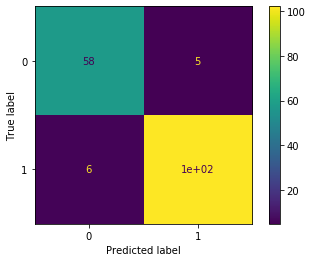

In [18]:
metrics.plot_confusion_matrix(lgr, X_test, y_test)

### Accuracy

Accuracy of our model:

In [19]:
metrics.accuracy_score(y_test, y_test_pred)

0.935672514619883

### Recall

The recall of each class:

In [20]:
metrics.recall_score(y_test, y_test_pred, average=None)

array([0.92063492, 0.94444444])

### Precision

The precision of each class:

In [21]:
metrics.precision_score(y_test, y_test_pred, average=None)

array([0.90625   , 0.95327103])

### F1score

The f1score of each class:

In [22]:
metrics.f1_score(y_test, y_test_pred, average=None)

array([0.91338583, 0.94883721])

### Receiver Operating Characteristic - AUC

In able to plot ROC or evaluate AUC, we need the probability outputs of our model instead of the final prediction.

We call the `predict_proba` method rather than `predict` in order to obtain a list of probabilities which represent the likelihood that a sample falls under a given category. 

In [23]:
probs = lgr.predict_proba(X_test)
malignant_probs = probs[:,1]

# calculating roc arguments
fpr, tpr, thresholds = metrics.roc_curve(y_test, malignant_probs)
# calculating auc
roc_auc = metrics.auc(fpr, tpr)

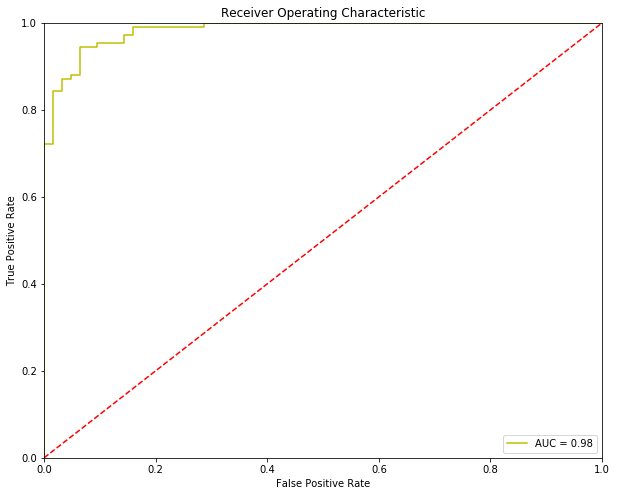

In [24]:
plt.figure(figsize=[10,8])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 4. Hyperparameter Tuning

Choosing the right hyperparameters for your machine learning algorithm is a crucial task, since it can make a big difference on the performance of a model. 

Machine Learning models are composed of two different types of parameters:

* **Hyperparameters** = are all the parameters which can be arbitrarily set by the user before starting training (eg. Learning rate, regularization parameter, batch size in the mini-batch gradient descent...).

* Model **parameters** = are instead learned during the model training (eg. weights in Linear Regression, Neural Networks...).

The model parameters define how to use input data to get the desired output and are learned at training time. Instead, Hyperparameters determine how our model is structured in the first place.
Hyperparameter tuning is a type of optimization problem. We have a set of hyperparameters and we aim to find the right combination of their values which can help us to find either the minimum (eg. loss) or the maximum (eg. accuracy) of a function.

<img src="figures/hyperparameter-tuning.png" alt="hyperparameter-tuning" style="width: 500px;"/>

## 4.1. Grid search

Grid search is a method by which we create sets of possible hyper-parameters values for each hyper-parameter, then test them against each other in a “grid.” 

The recipe below evaluates different $\lambda$ values for the regularized linear regression algorithm we have seen above (a Linear Regression with an $L_2$ regularization is called Ridge Regression) on the standard diabetes dataset. This is a one-dimensional grid search.

Grid Search can be implemented in Python using `scikit-learn` `GridSearchCV()` function. The `verbose` parameter dictates whether the function will print information as it runs, and the `cv` parameter refers to cross validation folds. 

In [25]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [26]:
# load the diabetes datasets
dataset = datasets.load_diabetes()

Dataset Description:

In [27]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [28]:
# Split the data into 2 sets
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)
print("Training set: ", X_train.shape, y_train.shape)
print("Testing set: ", X_test.shape, y_test.shape)

Training set:  (353, 10) (353,)
Testing set:  (89, 10) (89,)


In [29]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# load the diabetes datasets
dataset = datasets.load_diabetes()

# prepare a range of alpha values to test
grid = {'alpha': [1,0.1,0.01,0.001,0.0001,0]}

# create and fit a ridge regression model, testing each alpha
model = Ridge()
gsearch = GridSearchCV(estimator=model, param_grid=grid, scoring="neg_mean_squared_error", verbose=1)
gsearch.fit(X_train, y_train)

# summarize the results of the grid search
print('RMSE: ', np.round(np.sqrt(-1*gsearch.best_score_), 2))
print('Best regularization parameter: ', gsearch.best_estimator_.alpha)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
RMSE:  55.08
Best regularization parameter:  0.001


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


Evaluating RMSE performance on the testing set:

In [30]:
rmse_test = gsearch.score(X_test, y_test)
print('RMSE: ', np.round(np.sqrt(-1*rmse_test), 2))

RMSE:  54.37


## 4.2. Random search

As its name suggests, Random Search uses random combinations of hyperparameters. This means that not all of the parameter values are tried, and instead, parameters will be sampled with fixed numbers of iterations given by `n_iter` in the `RandomizedSearchCV()` function.

Random Search would be advised to use over Grid Search when the searching space is high meaning that there are more than 3 dimensions as Random Search is able to explore a wider hyperparameter space. In the below example, grid search only tested three unique values for each hyperperameter, whereas the random search tested 9 unique values for each. That means if one hyperparameter is more important than the others, random search will be better. Think of it this way: if hyperparameter 2 doesn’t really matter, then we would want 9 different hyperparameter 1 values to test instead of 3. The same holds true for higher dimensions (more hyperparameters).

<div class="item">
    <img src="figures/gs-vs-rs.png" alt="/gs-vs-rs" width="600px"/>
    <span class="caption">With grid search, nine trials only test three distinct places. With random search, all nine trails explore distinct values.</span>
</div>

For this we will use a logistic regression (a linear algorithm used for classification) which has many different hyperparameters. For this example we will only consider these hyperparameters:

* The penalty (The regularization type L1 or L2)
* The C value (The regularization parameter)

The data set we will be using is the classic and simple iris data set. First we need to import the things we need, as well as separate the target variable from the independent variables

In [31]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [32]:
# Split the 2 data into 2 sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)
print("Training set: ", X_train.shape, y_train.shape)
print("Testing set: ", X_test.shape, y_test.shape)

Training set:  (120, 4) (120,)
Testing set:  (30, 4) (30,)


In [33]:
# prepare a uniform distribution to sample for the penalty & C hyperparameters
penalty = ['l1', 'l2']
C = np.logspace(0, 4, num=10)
grid = dict(C=C, penalty=penalty)

# create and fit a ridge regression model, testing random alpha values
logistic = LogisticRegression()
rsearch = RandomizedSearchCV(estimator=logistic, param_distributions=grid, n_iter=50, scoring = 'accuracy')

rsearch.fit(X_train, y_train)

# summarize the results of the grid search
print('Accuracy: ', np.round(rsearch.best_score_, 2))
print('Best regularization penalty type: ', rsearch.best_estimator_.penalty)
print('Best regularization parameter: ', rsearch.best_estimator_.C)

Accuracy:  0.98
Best regularization penalty type:  l2
Best regularization parameter:  2.7825594022071245


# 5. Feature Engineering Techniques

Algorithms require features with some specific characteristic to work properly. Here, the need for feature engineering arises. Feature engineering efforts mainly have two goals:

* Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
* Improving the performance of machine learning models.

> The features you use influence more than everything else the result. No algorithm alone, to my knowledge, can supplement the information gain given by correct feature engineering.
— Luca Massaron

According to a survey in Forbes, data scientists spend 80% of their time on data preparation.

<div class="item">
    <img src="figures/forbes.png" alt="forbes" width="600px"/>
    <span class="caption">Forbes Survey (<a href="https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/">Source</a>)
    </span>
</div>

## 5.1. Data leakage

When training a machine learning model, we normally aim for the model that scores the highest on some metric, such as accuracy. Naturally, then, when we train a model that appears to score very well on our validation or test data-set, we select it as a well-performing model and productionize/finalize it.
However, have you ever encountered a situation in which a model performs well during testing, but fails to achieve the same level of performance during real-world usage? For example, has your model reached 99% accuracy during testing, but as soon as it is productionized and acts on real data, it fails to get anywhere near that level of performance?
Such a discrepancy between test performance and real-world performance is often explained by a phenomenon called **data leakage**.

Data leakage refers to a mistake make by the creator of a machine learning model in which they accidentally share information between the test and training data-sets. Typically, when splitting a data-set into testing and training sets, the goal is to ensure that no data is shared between the two. This is because the test set’s purpose is to simulate real-world, unseen data.


A very common error that people make is to leak information in the data **pre-processing step** of machine learning. It is essential that these transformations only have knowledge of the training set, even though they are applied to the test set as well. For example, if you decide that you want to run PCA as a pre-processing step, you should fit your PCA model on only the training set. Then, to apply it to your test set, you would only call its transform method (in the case of a `scikit-learn` model) on the test set. If, instead, you fit your pre-processor on the entire data-set, you will leak information from the test set, since the parameters of the pre-processing model will be fitted with knowledge of the test set.



In this section, we will use the loans prediction dataset provided in the following [competition](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/) organized by Analytics Vidhya in order to explore some **popular feature engineering techniques**. 

In python, scikit-learn library has a pre-built functionality under `sklearn.preprocessing`. There are many more options for pre-processing which we’ll explore.

Now, lets get started by importing important packages and the data set.

In [34]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("data/data_loans.csv")

In [35]:
data.head()

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
data.shape

(614, 13)

Let's seperate our features from our target variable and split the dataframe into 2 datasets.

In [37]:
y, X = data.pop("LoanStatus"), data
X.pop("LoanID")

# Split the 2 data into 2 sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Training set: ", X_train.shape, y_train.shape)
print("Testing set: ", X_test.shape, y_test.shape)

Training set:  (491, 11) (491,)
Testing set:  (123, 11) (123,)


## 5.2. Missing values imputation

Handling missing values is an essential preprocessing task that can drastically deteriorate your model when not done with sufficient care. Reasons for the missing values might be human errors, interruptions in the data flow, privacy concerns, and so on. Whatever is the reason, missing values affect the performance of the machine learning models.

A few questions should come up when handling missing values:

> Do I have missing values? How are they expressed in the data? Should I withhold samples with missing values? Or should I replace them? If so, which values should they be replaced with?

Some machine learning platforms automatically drop the rows which include missing values in the model training phase and it decreases the model performance because of the reduced training set size. On the other hand, most of the algorithms do not accept datasets with missing values and gives an error.

Before starting handling missing values it is important to identify the missing values and know with which value they are replaced. You should be able to find this out by combining the metadata information with exploratory analysis.
Once you know a bit more about the missing data you have to decide whether or not you want to keep entries with missing data.



Number of missing values in each column:

In [38]:
X_train.isna().sum(axis=0)

Gender                9
Married               2
Dependents           10
Education             0
SelfEmployed         24
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           17
LoanAmountTerm       10
CreditHistory        44
PropertyArea          0
dtype: int64

The most simple solution to the missing values is to drop the rows or the entire column. There is not an optimum threshold for dropping but you can use 50% as an example value and try to drop the rows and columns which have missing values with higher than this threshold. In our examples, we don't have such rows and columns.

The testing set should represent unseen data, that's why when doing feature engineering, we will apply exactly the same transformations applied to the training set. 

In [39]:
threshold = 0.5
# Dropping columns with missing value rate higher than threshold in the training set
X_train = X_train[X_train.columns[X_train.isnull().mean() < threshold]]
# Aligning the test dataset columns with the train dataset
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Dropping rows with missing value rate higher than threshold
X_train = X_train.loc[X_train.isnull().mean(axis=1) < threshold]
X_test = X_test.loc[X_test.isnull().mean(axis=1) < threshold]

In [40]:
print("Training set: ", X_train.shape, y_train.shape)
print("Testing set: ", X_test.shape, y_test.shape)

Training set:  (491, 11) (491,)
Testing set:  (123, 11) (123,)


### 5.2.1. Numerical imputation
Imputation is a more preferable option rather than dropping because it preserves the data size. However, there is an important selection of what you impute to the missing values. 

Except for the case of having a default value for missing values, a popular imputation method is to use the medians of the columns. As the averages of the columns are sensitive to the outlier values, while medians are more solid in this respect.


Columns with missing values:

In [41]:
# columns with missing values
missing_columns = X_train.isna().sum()[X_train.isna().sum()>0].index.values.tolist()
missing_columns

['Gender',
 'Married',
 'Dependents',
 'SelfEmployed',
 'LoanAmount',
 'LoanAmountTerm',
 'CreditHistory']

let's plot a histogram of our numerical columns 

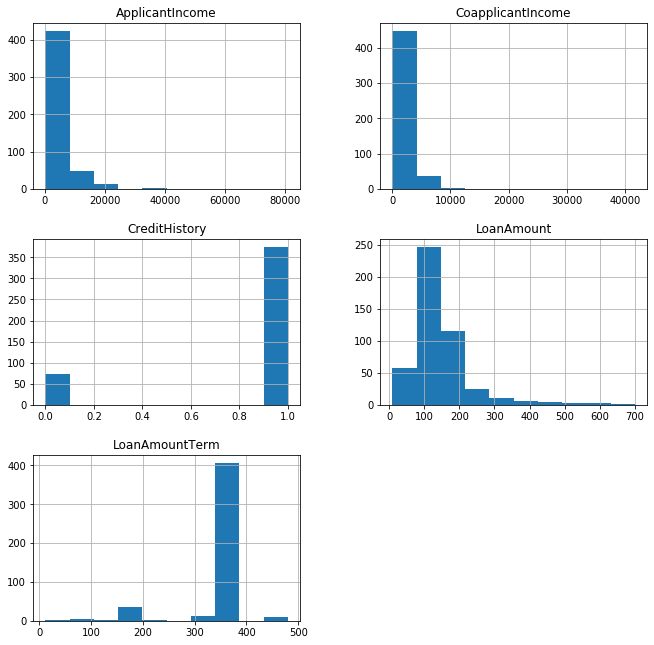

In [42]:
# numerical columns
numeric_columns = X_train.dtypes[((X_train.dtypes=="float64")|(X_train.dtypes=="int64"))].index.values.tolist()

#plot a histogram of numerical columns with missing values
X_train[numeric_columns].hist(figsize=[11,11]);

Let's impute missing values in column `CreditHistory` with 1, and the 2 other numercial columns `LoanAmount` & `LoanAmountTerm` with the median.

In [43]:
from sklearn.impute import SimpleImputer

# Let's define a constant imputer in order to impute missing values in CreditHistory with 1.
imp_constant = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=1)
X_train[["CreditHistory"]] = imp_constant.fit_transform(X_train[["CreditHistory"]])
X_test[["CreditHistory"]] = imp_constant.transform(X_test[["CreditHistory"]])

# Let's define an imputer with median strategy in order to impute missing values in LoanAmount and LoanAmountTerm
cols = ["LoanAmount", "LoanAmountTerm"]
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
X_train[cols] = imp_median.fit_transform(X_train[cols])
X_test[cols] = imp_median.transform(X_test[cols])

Number of missing values in each column:

In [44]:
X_train.isna().sum()

Gender                9
Married               2
Dependents           10
Education             0
SelfEmployed         24
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
LoanAmountTerm        0
CreditHistory         0
PropertyArea          0
dtype: int64

### 5.2.2. Categorical imputation

Replacing the missing values with the maximum occurred value in a column is a good option for handling categorical columns. But if you think the values in the column are distributed uniformly and there is not a dominant value, imputing a category like “Other” might be more sensible, because in such a case, your imputation is likely to converge a random selection.



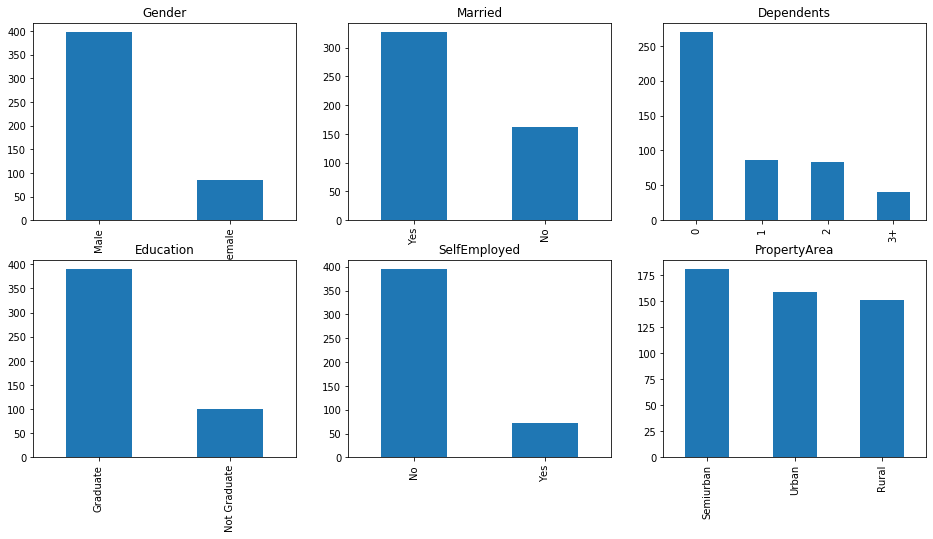

In [45]:
categorical_columns = X_train.dtypes[((X_train.dtypes=="object"))].index.values.tolist()

fig, ax = plt.subplots(2, int(len(categorical_columns)/2), figsize=(16,8))
for i, categorical_col in enumerate(X_train[categorical_columns]):
    X_train[categorical_col].value_counts().plot("bar", ax=sum(ax.tolist(), [])[i]).set_title(categorical_col)
fig.show()

Let's impute the missing values in the columns `Married`,` Sex`, `Dependent` with the dominant value (most frequent), while in the column` SelfEmployed` with a constant "UNK".

In [46]:
# Imputing missing values in columns Married, Gender, Dependents with the dominant (most frequent) value
cols = ["Married", "Gender", "Dependents"]
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train[cols] = imp_most_frequent.fit_transform(X_train[cols])
X_test[cols] = imp_most_frequent.transform(X_test[cols])

# Imputing column column SelfEmployed with a constant 'UNK'
imp_constant = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='UNK')
X_train[["SelfEmployed"]] = imp_constant.fit_transform(X_train[["SelfEmployed"]])
X_test[["SelfEmployed"]] = imp_constant.transform(X_test[["SelfEmployed"]])

Number of missing values in each column:

In [47]:
X_train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
SelfEmployed         0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
CreditHistory        0
PropertyArea         0
dtype: int64

## 5.3. Scaling

In most cases, the numerical features of the dataset do not have a certain range and they differ from each other. In real life, it is nonsense to expect age and income columns to have the same range. But from the machine learning point of view, how can these two columns be compared?

Scaling solves this problem. The continuous features become identical in terms of the range, after a scaling process. This process is not mandatory for many algorithms, but it might be still nice to apply. However, the algorithms based on distance calculations such as k-NN or k-Means need to have scaled continuous features as model input.

**We will talk more about the importance of scaling in the next chapter.**

`sklearn` provides a tool `MinMaxScaler` that will scale down all the features between 0 and 1. Mathematical formula for MinMaxScaler is:

\begin{equation}
{\displaystyle x'={\frac {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}}
\end{equation}

We will only scale the numerical columns.

In [48]:
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
scaled_columns = [x for x in numeric_columns if x != 'CreditHistory']

X_train[scaled_columns] = mmc.fit_transform(X_train[scaled_columns])
X_test[scaled_columns] = mmc.transform(X_test[scaled_columns])

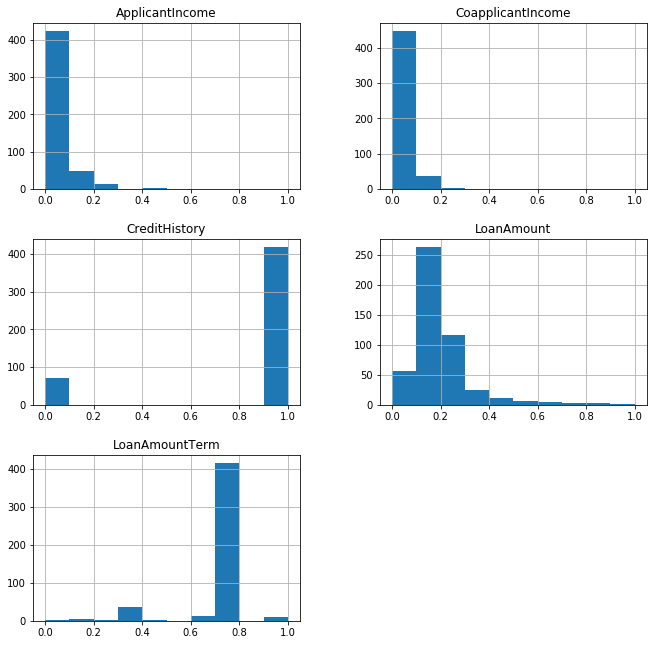

In [49]:
#plot a histogram of numerical columns with missing values
X_train[numeric_columns].hist(figsize=[11,11]);

## 5.4. Label encoding

In previous sections, we did the pre-processing for continuous numeric features. But, our data set has other features too such as Gender, Married, Dependents, SelfEmployed and Education. All these categorical features have string values. And algorithms work with numbers!

If we feed the categorical features to a logistic regression model for example, we get an error saying that it cannot convert string to float. So, what’s actually happening here is that most learners in `sklearn` needs numeric arrays. Features having string values cannot be handled automatically.

This encoding type is better for **ordinal categorical data** and if the **number of categorical features in the dataset** is huge, you may often use label encoding.

`Sklearn` provides a very efficient tool for encoding the levels of a categorical features into numeric values. `LabelEncoder` encode labels with value between 0 and n_classes-1.

In [50]:
X_train.head()

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea
291,Male,Yes,2,Graduate,No,0.052566,0.000000,0.170767,0.74359,0.0,Semiurban
507,Male,No,0,Graduate,No,0.042461,0.000000,0.125904,0.74359,1.0,Urban
328,Female,Yes,0,Graduate,No,0.051738,0.058824,0.146165,0.74359,1.0,Urban
609,Female,No,0,Graduate,No,0.034014,0.000000,0.089725,0.74359,1.0,Rural
69,Female,No,0,Graduate,No,0.051330,0.000000,0.183792,0.74359,0.0,Semiurban


Let's label encode binary catagorical columns only:

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Iterating over all the common columns in train and test
for col in ["Gender", "Married", "Education"]:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [52]:
X_train.head()

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea
291,1,1,2,0,No,0.052566,0.000000,0.170767,0.74359,0.0,Semiurban
507,1,0,0,0,No,0.042461,0.000000,0.125904,0.74359,1.0,Urban
328,0,1,0,0,No,0.051738,0.058824,0.146165,0.74359,1.0,Urban
609,0,0,0,0,No,0.034014,0.000000,0.089725,0.74359,1.0,Rural
69,0,0,0,0,No,0.051330,0.000000,0.183792,0.74359,0.0,Semiurban


## 5.5. One-hot encoding

Depending on the data, label encoding introduces a new problem. For example, we have encoded a set of `Gender` into numerical data. This is actually categorical data and there is no relation, of any kind, between the rows.
The problem here is, since there are different numbers in the same column, the model will misunderstand the data and will be confused into thinking that there's some kind of order or hierarchy, 0 < 1 < 2. But this isn’t the case at all. To overcome this problem, we use One Hot Encoder.

We mainly use one hot encoding with **nominal data**.

One-hot encoding is one of the most common encoding methods in machine learning. This method spreads the values in a column to multiple flag columns and assigns 0 or 1 to them. These binary values express the relationship between grouped and encoded column.

This method changes your categorical data, which is challenging to understand for algorithms, to a numerical format and enables you to group your categorical data without losing any information. 

<div class="item">
    <img src="figures/one-hot.png" alt="one-hot" width="600px"/>
    <span class="caption">One hot encoding example on City column
    </span>
</div>

In `sklearn`, we can use the `OneHotEncoder` class which creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter). 2 important parameters:

* **drop: ‘first’ or a array-like of shape (n_features,), default=None**

    Specifies a methodology to use to drop one of the categories per feature. This is useful in situations where perfectly collinear features cause problems, such as when feeding the resulting data into a neural network or an unregularized regression.
    
    
* **handle_unknown: {‘error’, ‘ignore’}, default=’error’**

    Whether to raise an error or ignore if an unknown categorical feature is present during transform (default is to raise). When this parameter is set to ‘ignore’ and an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. 

In [53]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = None, handle_unknown='ignore', sparse=False)

# Define categorical to be one hot encoded
ohe_cols = ["Dependents", "SelfEmployed", "PropertyArea"]

# Encode categorical columns, and store results in a new dataframe
X_train_encoded = pd.DataFrame(ohe.fit_transform(X_train[ohe_cols]), index=X_train.index)
X_test_encoded = pd.DataFrame(ohe.transform(X_test[ohe_cols]), index=X_test.index)

# Retrieve encoded columns names
X_train_encoded.columns = ohe.get_feature_names(ohe_cols)
X_test_encoded.columns = ohe.get_feature_names(ohe_cols)

# Drop initial columns 
X_train.drop(ohe_cols ,axis=1, inplace=True)
X_test.drop(ohe_cols ,axis=1, inplace=True)

# Add encoded columns to initial dataset
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded ], axis=1)

In [54]:
X_train.head()

,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,SelfEmployed_No,SelfEmployed_UNK,SelfEmployed_Yes,PropertyArea_Rural,PropertyArea_Semiurban,PropertyArea_Urban
291,1,1,0,0.052566,0.000000,0.170767,0.74359,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
507,1,0,0,0.042461,0.000000,0.125904,0.74359,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
328,0,1,0,0.051738,0.058824,0.146165,0.74359,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
609,0,0,0,0.034014,0.000000,0.089725,0.74359,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
69,0,0,0,0.051330,0.000000,0.183792,0.74359,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## 5.6. Other feature engineering techniques & references

The aim of this section is to familiarize you with the basic feature engineering techniques and have a deeper understanding of the situations of where to apply those techniques.

These methods work because of the underlying assumptions of the algorithms. This is by no means an exhaustive list of the methods. Other type of preprocessing techniques include:

### 5.6.1. Handling outliers

Data outliers can spoil and mislead the training process resulting in longer training times, less accurate models and ultimately poorer results.

Before mentioning some techniques for how outliers can be handled, It's good to state that the best way to detect the outliers is to demonstrate the data visually. All other statistical methodologies are open to making mistakes, whereas visualizing the outliers might give a chance to take a decision with high precision.

There are many different methods of dealing with outliers, here are some popular techniques:

* **Univariate method**: This method looks for data points with extreme values on one variable.

    For more details about the statistical methods used for outlier detection, check [this blog](http://colingorrie.github.io/outlier-detection.html)


* **Multivariate method**: Here we look for unusual combinations on all the variables.

<div class="item">
    <img src="figures/multivariate-outlier-example.jpg" alt="multivariate-outlier-example" width="500px"/>
</div>

* **Minkowski error**: This method reduces the contribution of potential outliers in the training process.

    Unlike the univariate and multivariate methods, it doesn't detect and clean the outliers. Instead, it reduces the impact that outliers will have in the model.

    The Minkowski error is a loss index that is more insensitive to outliers than the standard mean squared error. The mean squared error raises each instance error to the square, making a too big contribution of outliers to the total error. The Minkowski error solves that by raising each instance error to a number smaller than 2, for instance 1.5. This reduces the contribution of outliers to the total error. 


### 5.6.2. Binning/Bucketing

Binning can be applied on both categorical and numerical data:


<div class="item">
    <img src="figures/binning.png" alt="binning" width="400px" style="padding:20px;"/>
</div>


If you choose to bucketize your numerical features, be clear about how you are setting the boundaries and which type of bucketing you’re applying:

* **Buckets with equally spaced boundaries**: the boundaries are fixed and encompass the same range (for example, 0-4 degrees, 5-9 degrees, and 10-14 degrees). Some buckets could contain many points, while others could have few or none.

* **Buckets with quantile boundaries**: each bucket has the same number of points. The boundaries are not fixed and could encompass a narrow or wide span of values. 

<div class="row">
  <div class="column">
    <img src="figures/bucketizing-1.svg" alt="bucketizing-1"/>
  </div>
  <div class="column">
     <img src="figures/bucketizing-2.svg" alt="bucketizing-2"/>
  </div>
</div>
    


Bucketing with equally spaced boundaries is an easy method that works for a lot of data distributions. For skewed data, however, try bucketing with quantile bucketing.

### 5.6.3. Log transform

Logarithm transformation is one of the most commonly used mathematical transformations in feature engineering. What are the benefits of log transform:

It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.
In most of the cases the magnitude order of the data changes within the range of the data. For instance, the difference between the ages of 15 and 20 is not equal to the ages 65 and 70. In terms of years, yes, they are identical, but for all other aspects, 5 years of difference in young ages mean a higher magnitude difference. This type of data comes from a multiplicative process and log transform normalizes the magnitude differences like that.

It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model becomes more robust.

A critical note: The data you apply log transform must have only positive values, otherwise you receive an error. Also, you can add 1 to your data before transforming it. Thus, you ensure the output of the transformation to be positive.